In [1]:
pip install pandas sqlalchemy pymysql

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/0c/94/e4181a1f6286f545507528c78016e00065ea913276888db2262507693ce5/PyMySQL-1.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ---------------------------------------- 45.0/45.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/54/15/98d703a1101e0bfb106e4085f41f937ddca869d16746c076fb818b6f883d/mysql_connector_python-9.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.1/16.1 MB 1.7 MB/s eta 0:00:10
    --------------------------------------- 0.2/16.1 MB 1.9 MB/s eta 0:00:09
    --------------------------------------- 0.3/16.1 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.4/16.1 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.5/16.1 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.7/16.1 MB 2.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/16.1 MB 2.3 MB/s eta 0:00:0

In [1]:
pip install mysql-connector-python pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
import mysql.connector

# Connect to MySQL
try:
    connection = mysql.connector.connect(
        host='localhost',  # Replace with your database host
        user='root',  # Replace with your MySQL username
        password='Abhi@2002',  # Replace with your MySQL password
        database='cancer_db',
        port='3306'
    )
    
    cursor = connection.cursor()
    
    # Create database if not exists
    cursor.execute("CREATE DATABASE IF NOT EXISTS cancer_db")
    
    # Use the database
    cursor.execute("USE cancer_db")
    
    # Create the table
    create_table_query = """
    CREATE TABLE IF NOT EXISTS cancer_details (
        mean_radius FLOAT,
        mean_texture FLOAT,
        mean_perimeter FLOAT,
        mean_area FLOAT,
        mean_smoothness FLOAT,
        mean_compactness FLOAT,
        mean_concavity FLOAT,
        mean_concave_points FLOAT,
        mean_symmetry FLOAT,
        mean_fractal_dimension FLOAT,
        radius_error FLOAT,
        texture_error FLOAT,
        perimeter_error FLOAT,
        area_error FLOAT,
        smoothness_error FLOAT,
        compactness_error FLOAT,
        concavity_error FLOAT,
        concave_points_error FLOAT,
        symmetry_error FLOAT,
        fractal_dimension_error FLOAT,
        worst_radius FLOAT,
        worst_texture FLOAT,
        worst_perimeter FLOAT,
        worst_area FLOAT,
        worst_smoothness FLOAT,
        worst_compactness FLOAT,
        worst_concavity FLOAT,
        worst_concave_points FLOAT,
        worst_symmetry FLOAT,
        worst_fractal_dimension FLOAT,
        target INT
    );
    """
    cursor.execute(create_table_query)
    print("Table cancer_data created successfully in cancer_db database.")
    
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection closed.")

Table cancer_data created successfully in cancer_db database.
MySQL connection closed.


In [100]:
import mysql.connector
import pandas as pd

# Load your dataset
file_path = r'C:\Users\Dell\Downloads\cancer_dataset.csv'
data = pd.read_csv(file_path)

# Connect to MySQL
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Abhi@2002',
    database='cancer_db'
)

cursor = connection.cursor()

# Prepare the insert query
insert_query = """
INSERT INTO cancer_details (mean_radius, mean_texture, mean_perimeter, mean_area, 
                            mean_smoothness, mean_compactness, mean_concavity, mean_concave_points, 
                            mean_symmetry, mean_fractal_dimension, radius_error, texture_error, 
                            perimeter_error, area_error, smoothness_error, compactness_error, 
                            concavity_error, concave_points_error, symmetry_error, fractal_dimension_error, 
                            worst_radius, worst_texture, worst_perimeter, worst_area, worst_smoothness, 
                            worst_compactness, worst_concavity, worst_concave_points, worst_symmetry, 
                            worst_fractal_dimension, target)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Insert each row into the MySQL database
for row in data.itertuples(index=False, name=None):  # Exclude the index from rows
    try:
        cursor.execute(insert_query, row)
    except mysql.connector.Error as err:
        print(f"Error inserting row {row}: {err}")
        continue

# Commit the transaction
connection.commit()
print("Data inserted successfully!")

# Close the connection
connection.close()


Data inserted successfully!


In [39]:
# Display first 5 rows
data.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [40]:
# Display last 5 rows
data.tail()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst_smoothness  worst_compactness  worst_concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [41]:
print(data.shape)  # This will output (rows, columns)

(569, 31)


In [42]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 569
Number of Columns: 31


In [43]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [44]:
# Checking for NULL values (Boolean values)
data.isnull()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False            False   
4          False         False           False      False            False   
..           ...           ...             ...        ...              ...   
564        False         False           False      False            False   
565        False         False           False      False            False   
566        False         False           False      False            False   
567        False         False           False      False            False   
568        False         False           False      False            False   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0               False           False                False          False   
1               False           False                False          False   
2               False           False                False          False   
3               False           False                False          False   
4               False           False                False          False   
..                ...             ...                  ...            ...   
564             False           False                False          False   
565             False           False                False          False   
566             False           False                False          False   
567             False           False                False          False   
568             False           False                False          False   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                     False  ...          False            False       False   
1                     False  ...          False            False       False   
2                     False  ...          False            False       False   
3                     False  ...          False            False       False   
4                     False  ...          False            False       False   
..                      ...  ...            ...              ...         ...   
564                   False  ...          False            False       False   
565                   False  ...          False            False       False   
566                   False  ...          False            False       False   
567                   False  ...          False            False       False   
568                   False  ...          False            False       False   

     worst_smoothness  worst_compactness  worst_concavity  \
0               False              False            False   
1               False              False            False   
2               False              False            False   
3               False              False            False   
4               False              False            False   
..                ...                ...              ...   
564             False              False            False   
565             False              False            False   
566             False              False            False   
567             False              False            False   
568             False              False            False   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  target  
0                   False           False                    False   False  
1                   False           False                    False   False  
2                   False           False                    False   False  
3                   False           False                    False   False  
4                   False           False                    Fal

In [45]:
data.isnull().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

In [46]:
data.nunique()

mean_radius                456
mean_texture               479
mean_perimeter             522
mean_area                  539
mean_smoothness            474
mean_compactness           537
mean_concavity             537
mean_concave_points        542
mean_symmetry              432
mean_fractal_dimension     499
radius_error               540
texture_error              519
perimeter_error            533
area_error                 528
smoothness_error           547
compactness_error          541
concavity_error            533
concave_points_error       507
symmetry_error             498
fractal_dimension_error    545
worst_radius               457
worst_texture              511
worst_perimeter            514
worst_area                 544
worst_smoothness           411
worst_compactness          529
worst_concavity            539
worst_concave_points       492
worst_symmetry             500
worst_fractal_dimension    535
target                       2
dtype: int64

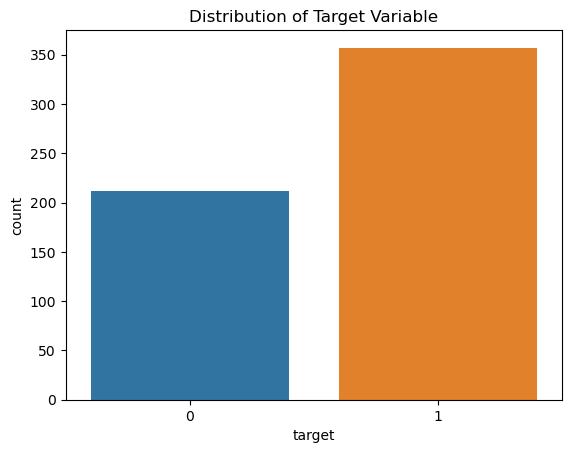

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


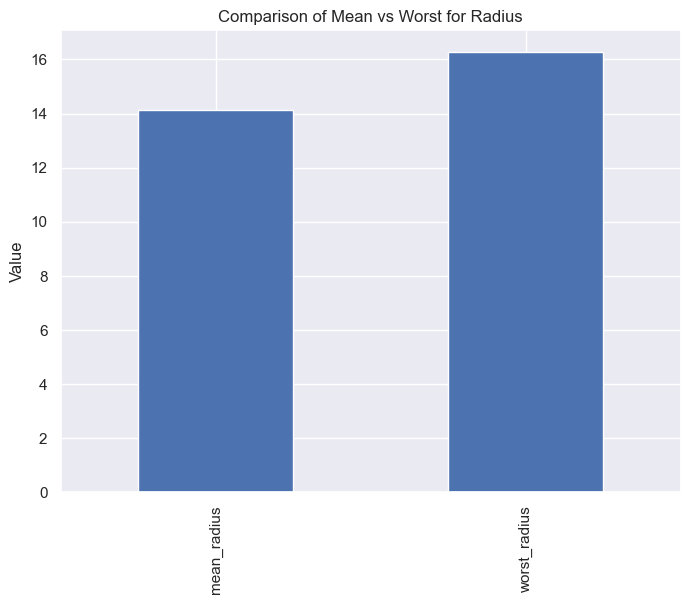

In [125]:
import matplotlib.pyplot as plt

# Example for comparing the 'mean_radius' and 'worst_radius'
cancer_details[['mean_radius', 'worst_radius']].mean().plot(kind='bar')
plt.title('Comparison of Mean vs Worst for Radius')
plt.ylabel('Value')
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")


Model accuracy: 0.9707602339181286


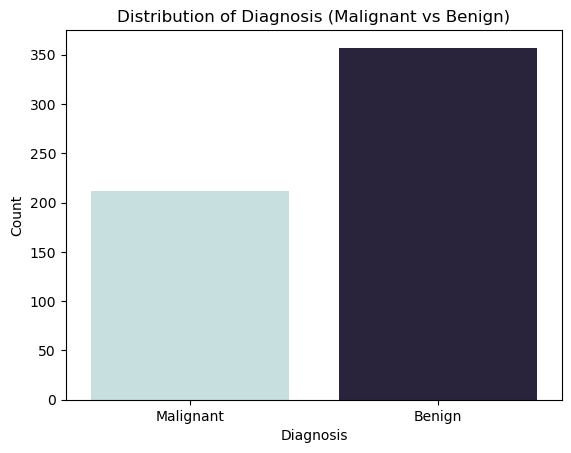

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the diagnosis distribution (Malignant vs Benign)
sns.countplot(x='diagnosis', data=cancer_data, palette="ch:start=.2,rot=-.3")
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


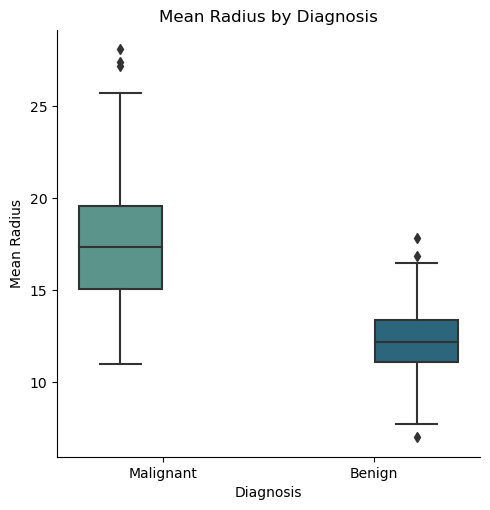

In [50]:
# Catplot (Mean Radius by Diagnosis)
sns.catplot(x='diagnosis', y='mean radius', data=cancer_data, hue='diagnosis', palette="crest", kind="box", legend=False)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()


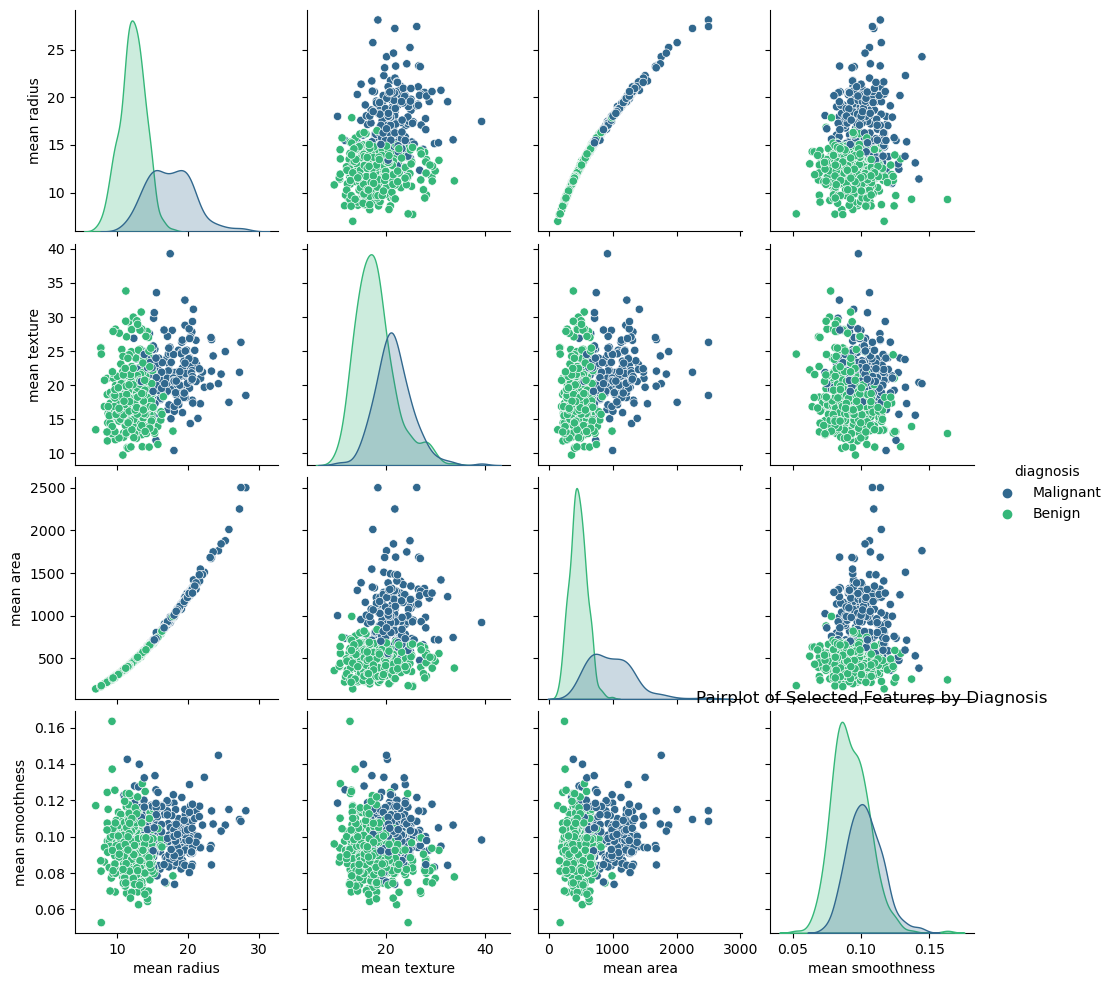

In [53]:
# Selecting a few features to plot
features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']

# Pairplot of the selected features
sns.pairplot(cancer_data[features + ['diagnosis']], hue='diagnosis', palette="viridis")
plt.title('Pairplot of Selected Features by Diagnosis')
plt.show()


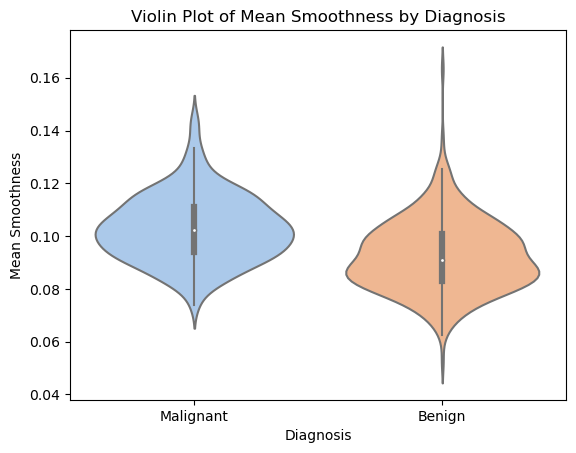

In [54]:
# Violin plot for 'mean smoothness' by 'diagnosis'
sns.violinplot(x='diagnosis', y='mean smoothness', data=cancer_data, palette='pastel')
plt.title('Violin Plot of Mean Smoothness by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Smoothness')
plt.show()


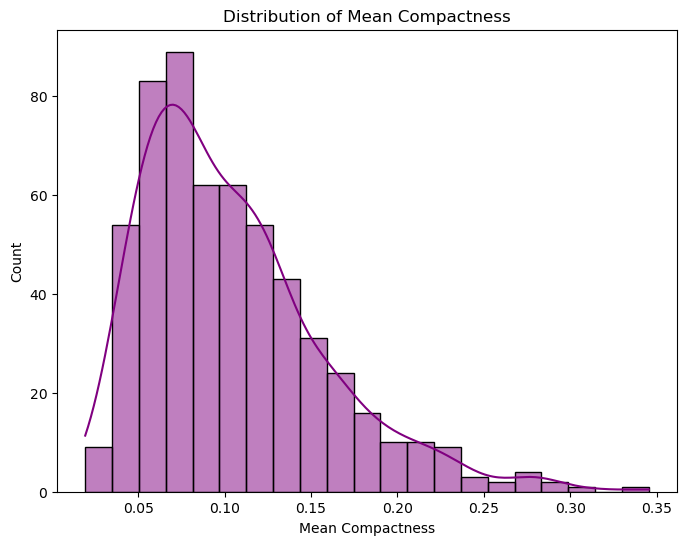

In [57]:
# Histogram for 'mean compactness'
plt.figure(figsize=(8, 6))
sns.histplot(data=cancer_data, x='mean compactness', kde=True, color='purple')
plt.title('Distribution of Mean Compactness')
plt.xlabel('Mean Compactness')
plt.ylabel('Count')
plt.show()


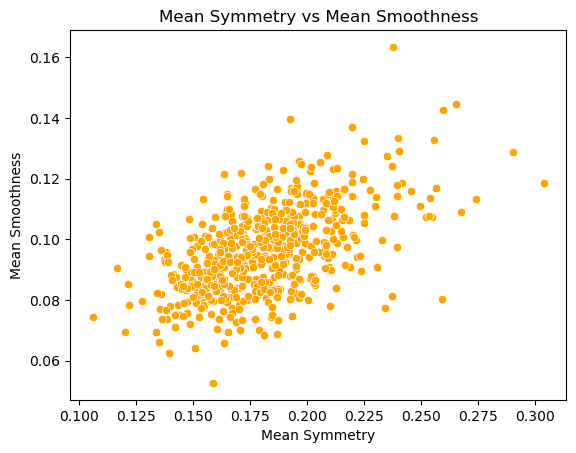

In [58]:
# Scatter plot of 'mean symmetry' vs. 'mean smoothness'
sns.scatterplot(x='mean symmetry', y='mean smoothness', data=cancer_data, color='orange')
plt.title('Mean Symmetry vs Mean Smoothness')
plt.xlabel('Mean Symmetry')
plt.ylabel('Mean Smoothness')
plt.show()


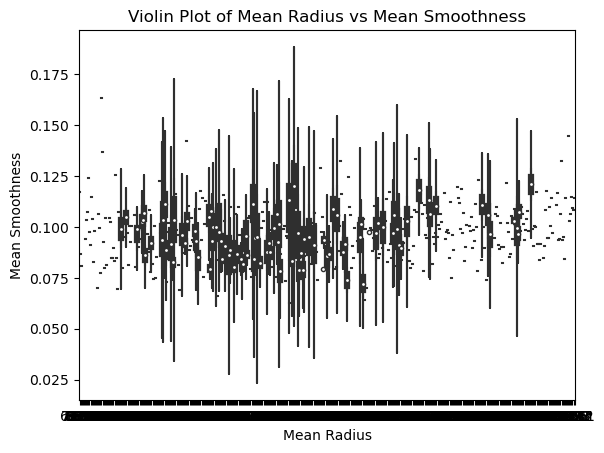

In [59]:
# Violin plot for 'mean radius' vs 'mean smoothness'
sns.violinplot(x='mean radius', y='mean smoothness', data=cancer_data, palette='crest')
plt.title('Violin Plot of Mean Radius vs Mean Smoothness')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Smoothness')
plt.show()


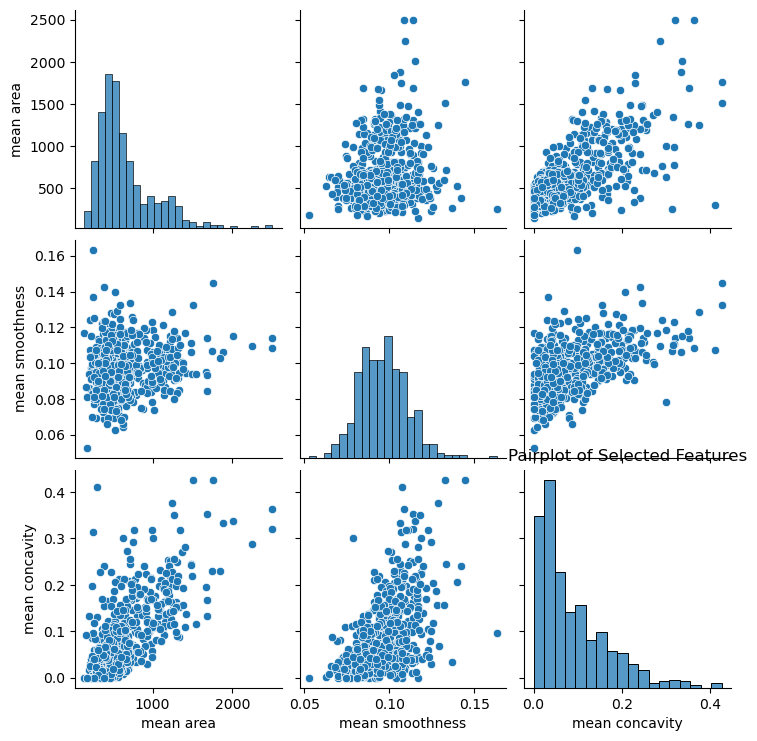

In [63]:
# Pairplot of 'mean area', 'mean smoothness', and 'mean concavity'
sns.pairplot(cancer_data[['mean area', 'mean smoothness', 'mean concavity']])
plt.title('Pairplot of Selected Features')
plt.show()


In [ ]:
# Histogram of 'mean fractal dimension' colored by 'mean texture'
plt.figure(figsize=(8, 6))
sns.histplot(data=cancer_data, x='mean fractal dimension', hue='mean texture', palette='viridis')
plt.title('Histogram of Mean Fractal Dimension colored by Mean Texture')
plt.xlabel('Mean Fractal Dimension')
plt.ylabel('Count')
plt.show()


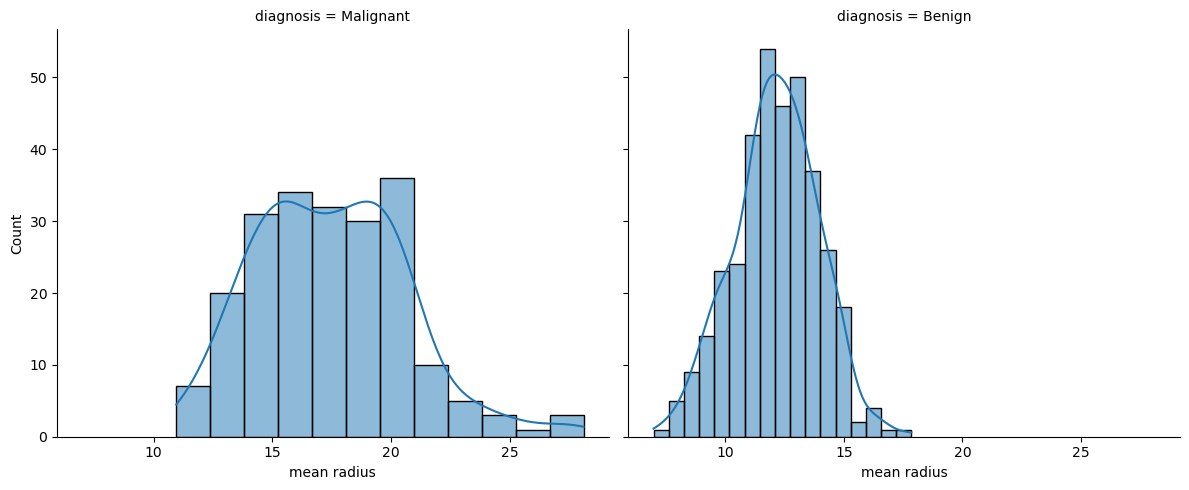

In [66]:
# FacetGrid for multiple features (e.g., 'mean radius', 'mean texture', 'mean area')
g = sns.FacetGrid(cancer_data, col="diagnosis", height=5, aspect=1.2)
g.map(sns.histplot, 'mean radius', kde=True)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\2992236654.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='diagnosis', y='mean radius', data=cancer_data, jitter=True, palette='viridis')


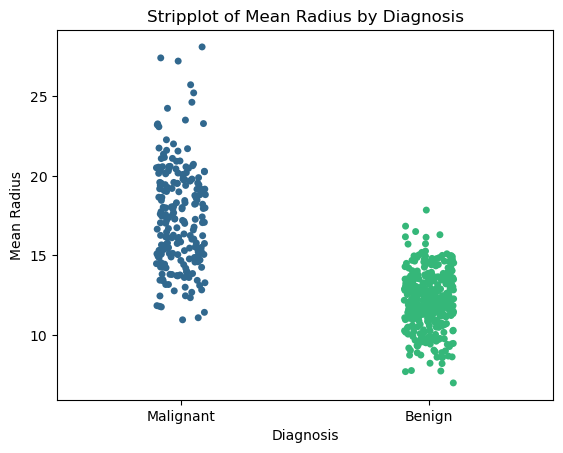

In [69]:
# Stripplot of 'mean radius' by 'diagnosis'
sns.stripplot(x='diagnosis', y='mean radius', data=cancer_data, jitter=True, palette='viridis')
plt.title('Stripplot of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()


   mean_radius  target
0         20.5       0
1         20.5       0
2         20.5       0
3         20.5       0
4         20.5       0


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\3147900438.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cancer_data = pd.read_sql(query, db_connection)


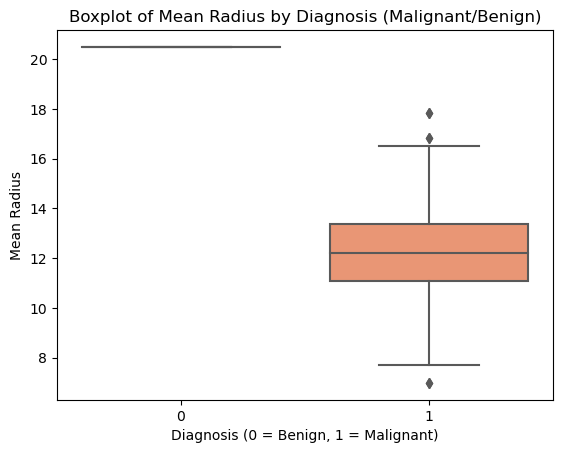

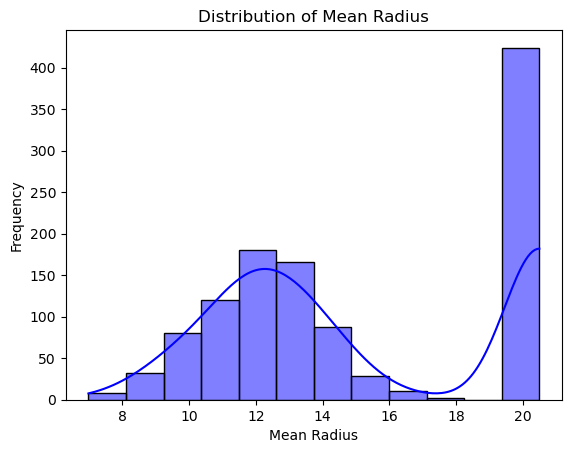

In [111]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",      # Your MySQL server host (e.g., localhost or an IP)
    user="root",  # Your MySQL username
    password="Abhi@2002",  # Your MySQL password
    database="cancer_db"   # Your database name
)

# Query to fetch data from the 'cancer_details' table
query = """
SELECT mean_radius, target FROM cancer_details
"""

# Load the data into a pandas DataFrame
cancer_data = pd.read_sql(query, db_connection)

# Close the database connection
db_connection.close()

# Print the first few rows of the data
print(cancer_data.head())

# 1. Visualizing 'mean_radius' vs. 'target' (Malignant = 1, Benign = 0)
sns.boxplot(x='target', y='mean_radius', data=cancer_data, palette='Set2')
plt.title('Boxplot of Mean Radius by Diagnosis (Malignant/Benign)')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Mean Radius')
plt.show()

# 2. Visualizing the distribution of 'mean_radius'
sns.histplot(cancer_data['mean_radius'], kde=True, color='blue')
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()


In [164]:
query = """
SELECT 
    target,
    AVG(mean_radius) AS avg_mean_radius,
    AVG(mean_area) AS avg_mean_area,
    MAX(worst_radius) AS max_worst_radius,
    MIN(worst_area) AS min_worst_area
FROM cancer_details
GROUP BY target;
"""

# Execute the query and load the result into a DataFrame
aggregated_df = pd.read_sql(query, db_connection)
print("Aggregated Data by Target:")
print(aggregated_df)


Aggregated Data by Target:
   target  avg_mean_radius  avg_mean_area  max_worst_radius  min_worst_area
0       0        20.500000     978.376415             36.04           508.1
1       1        12.146524     462.790196             19.82           185.2


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\2316887960.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [165]:
query = """
SELECT target, mean_radius, mean_area, worst_radius, worst_area
FROM cancer_details
WHERE mean_radius > 20 AND worst_area > 1000
ORDER BY mean_radius DESC
LIMIT 10;
"""

# Execute the query and load the result into a DataFrame
filtered_df = pd.read_sql(query, db_connection)
print("Filtered Top Records:")
print(filtered_df)


Filtered Top Records:
   target  mean_radius  mean_area  worst_radius  worst_area
0       0         20.5     1001.0         25.38      2019.0
1       0         20.5     1326.0         24.99      1956.0
2       0         20.5     1203.0         23.57      1709.0
3       0         20.5     1297.0         22.54      1575.0
4       0         20.5     1040.0         22.88      1606.0
5       0         20.5      797.8         19.19      1150.0
6       0         20.5      781.0         20.42      1299.0
7       0         20.5     1123.0         20.96      1332.0
8       0         20.5      684.5         19.07      1138.0
9       0         20.5      798.8         20.96      1315.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\3937845547.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [166]:
query = """
SELECT 
    target,
    COUNT(*) AS record_count
FROM cancer_details
GROUP BY target;
"""

# Execute the query and load the result into a DataFrame
count_df = pd.read_sql(query, db_connection)
print("Record Count by Target:")
print(count_df)


Record Count by Target:
   target  record_count
0       0           424
1       1           714


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\2470761030.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [168]:
query = """
SELECT 
    target,
    AVG(mean_radius) AS avg_mean_radius,
    AVG(worst_radius) AS avg_worst_radius,
    AVG(mean_area) AS avg_mean_area,
    AVG(worst_area) AS avg_worst_area
FROM cancer_details
GROUP BY target;
"""

# Execute the query and load the result into a DataFrame
pivot_summary_df = pd.read_sql(query, db_connection)
print("Pivot-like Summary:")
print(pivot_summary_df)


Pivot-like Summary:
   target  avg_mean_radius  avg_worst_radius  avg_mean_area  avg_worst_area
0       0        20.500000         21.134811     978.376415     1422.286322
1       1        12.146524         13.379801     462.790196      558.899440


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\1289758770.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\4237722214.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cancer_data = pd.read_sql(query, db_connection)


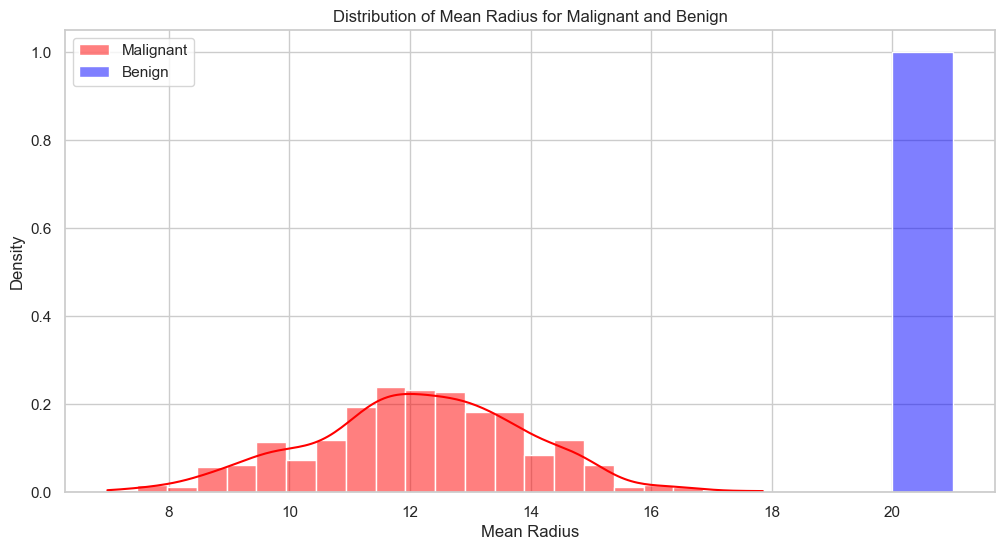

In [112]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to MySQL Database
db_connection = mysql.connector.connect(
    host="localhost", 
    user="root",  
    password="Abhi@2002",  
    database="cancer_db"
)

# Query to fetch data
query = """
SELECT mean_radius, mean_area, mean_texture, mean_smoothness, target 
FROM cancer_details
"""

# Load the data into a DataFrame
cancer_data = pd.read_sql(query, db_connection)

# Close the database connection
db_connection.close()

# Visualizing the distribution of 'mean_radius', 'mean_area', and 'mean_texture' by 'target'
sns.set(style="whitegrid")

# Plotting multiple histograms for the features
plt.figure(figsize=(12, 6))
sns.histplot(cancer_data[cancer_data['target'] == 1]['mean_radius'], kde=True, color='red', label='Malignant', stat='density')
sns.histplot(cancer_data[cancer_data['target'] == 0]['mean_radius'], kde=True, color='blue', label='Benign', stat='density')
plt.title('Distribution of Mean Radius for Malignant and Benign')
plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.legend()
plt.show()


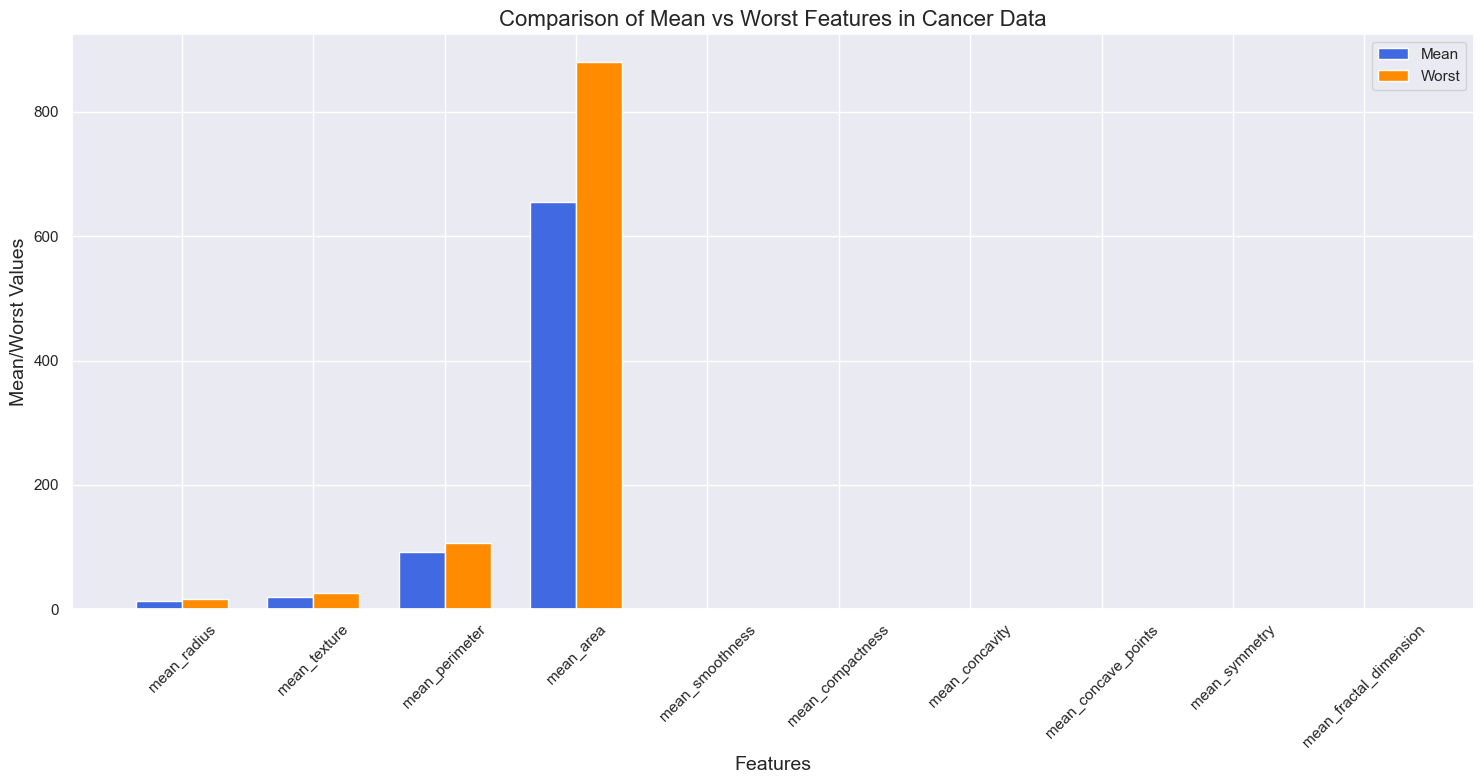

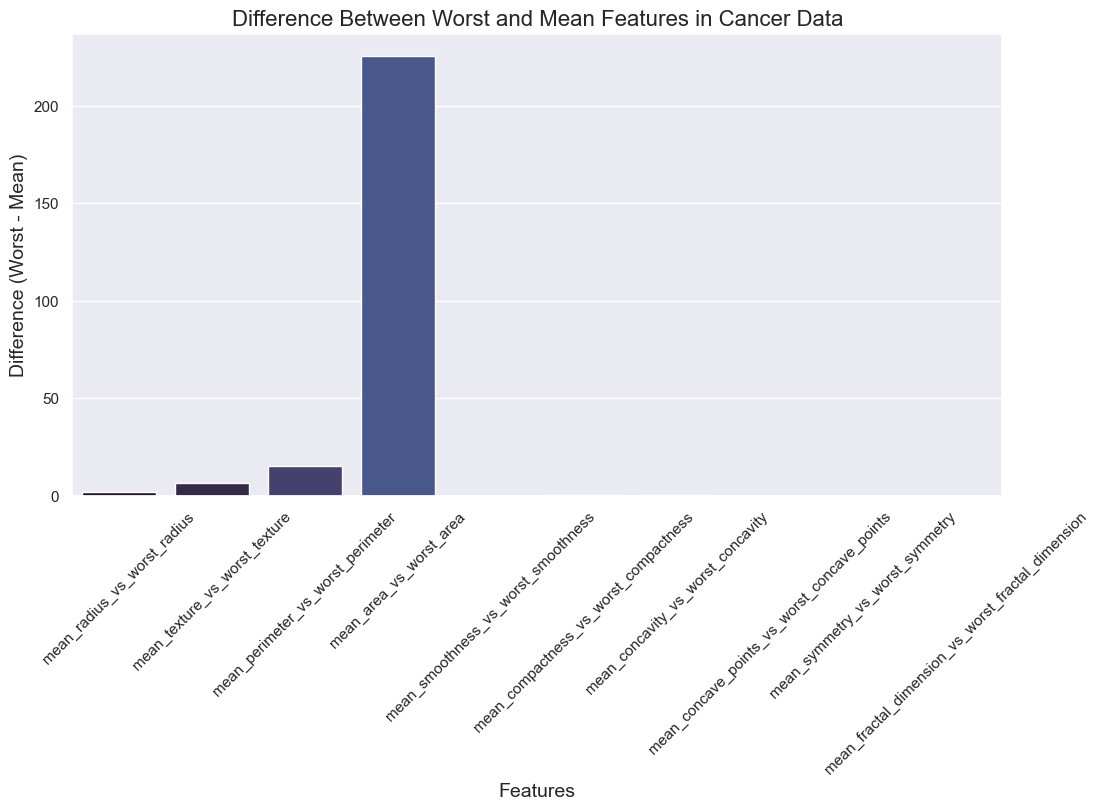

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have cancer_details as a DataFrame
# For example, load it from a CSV if needed:
# cancer_details = pd.read_csv('path_to_cancer_details.csv')

# Clean column names (if needed, to remove leading/trailing spaces)
cancer_details.columns = cancer_details.columns.str.strip()

# Extract 'mean' and 'worst' columns
mean_columns = [col for col in cancer_details.columns if 'mean' in col]
worst_columns = [col for col in cancer_details.columns if 'worst' in col]

# Create a DataFrame to store the comparison of mean vs worst
comparison_df = pd.DataFrame()

# Add the mean and worst values to comparison_df and calculate the difference
for mean_col, worst_col in zip(mean_columns, worst_columns):
    comparison_df[mean_col] = cancer_details[mean_col]
    comparison_df[worst_col] = cancer_details[worst_col]
    comparison_df[f"{mean_col}_vs_{worst_col}"] = cancer_details[worst_col] - cancer_details[mean_col]

# Set the figure size for plotting
plt.figure(figsize=(15, 8))

# Create a bar plot to compare the mean and worst values
comparison_means = comparison_df[mean_columns].mean()
comparison_worst = comparison_df[worst_columns].mean()

# Define bar width and index
bar_width = 0.35
index = range(len(mean_columns))

# Plotting mean vs worst
plt.bar(index, comparison_means, bar_width, label="Mean", color='royalblue')
plt.bar([i + bar_width for i in index], comparison_worst, bar_width, label="Worst", color='darkorange')

# Adding labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mean/Worst Values', fontsize=14)
plt.title('Comparison of Mean vs Worst Features in Cancer Data', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], mean_columns, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Visualize the differences between mean and worst for each feature
difference_means = comparison_df[[f"{mean_col}_vs_{worst_col}" for mean_col, worst_col in zip(mean_columns, worst_columns)]].mean()

# Plot the differences
plt.figure(figsize=(12, 6))
sns.barplot(x=difference_means.index, y=difference_means.values, palette="mako")
plt.xlabel('Features', fontsize=14)
plt.ylabel('Difference (Worst - Mean)', fontsize=14)
plt.title('Difference Between Worst and Mean Features in Cancer Data', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [127]:
# Assuming target column contains 0 for benign and 1 for malignant tumors
benign_data = cancer_details[cancer_details['target'] == 0]
malignant_data = cancer_details[cancer_details['target'] == 1]

# Calculate the mean of the features for both benign and malignant
mean_benign = benign_data[mean_columns].mean()
mean_malignant = malignant_data[mean_columns].mean()

print("Mean Features for Benign Tumors:\n", mean_benign)
print("\nMean Features for Malignant Tumors:\n", mean_malignant)


Mean Features for Benign Tumors:
 mean_radius                17.462830
mean_texture               21.604906
mean_perimeter            115.365377
mean_area                 978.376415
mean_smoothness             0.102898
mean_compactness            0.145188
mean_concavity              0.160775
mean_concave_points         0.087990
mean_symmetry               0.192909
mean_fractal_dimension      0.062680
dtype: float64

Mean Features for Malignant Tumors:
 mean_radius                12.146524
mean_texture               17.914762
mean_perimeter             78.075406
mean_area                 462.790196
mean_smoothness             0.092478
mean_compactness            0.080085
mean_concavity              0.046058
mean_concave_points         0.025717
mean_symmetry               0.174186
mean_fractal_dimension      0.062867
dtype: float64


In [128]:
# Calculate correlation between 'mean_radius' and 'mean_area'
correlation = cancer_details['mean_radius'].corr(cancer_details['mean_area'])
print("Correlation between mean_radius and mean_area:", correlation)


Correlation between mean_radius and mean_area: 0.9873571700566124


In [129]:
# Calculate the mean and error for features like 'mean_radius' and 'radius_error'
mean_radius = cancer_details['mean_radius'].mean()
radius_error = cancer_details['radius_error'].mean()

print(f"Mean of mean_radius: {mean_radius}")
print(f"Mean of radius_error: {radius_error}")


Mean of mean_radius: 14.127291739894552
Mean of radius_error: 0.4051720562390158


In [130]:
# Group by target (benign vs malignant) and calculate mean for features
grouped_data = cancer_details.groupby('target')[mean_columns].mean()
print("Mean values by tumor type (0 = Benign, 1 = Malignant):\n", grouped_data)


Mean values by tumor type (0 = Benign, 1 = Malignant):
         mean_radius  mean_texture  mean_perimeter   mean_area  \
target                                                          
0         17.462830     21.604906      115.365377  978.376415   
1         12.146524     17.914762       78.075406  462.790196   

        mean_smoothness  mean_compactness  mean_concavity  \
target                                                      
0              0.102898          0.145188        0.160775   
1              0.092478          0.080085        0.046058   

        mean_concave_points  mean_symmetry  mean_fractal_dimension  
target                                                              
0                  0.087990       0.192909                0.062680  
1                  0.025717       0.174186                0.062867  


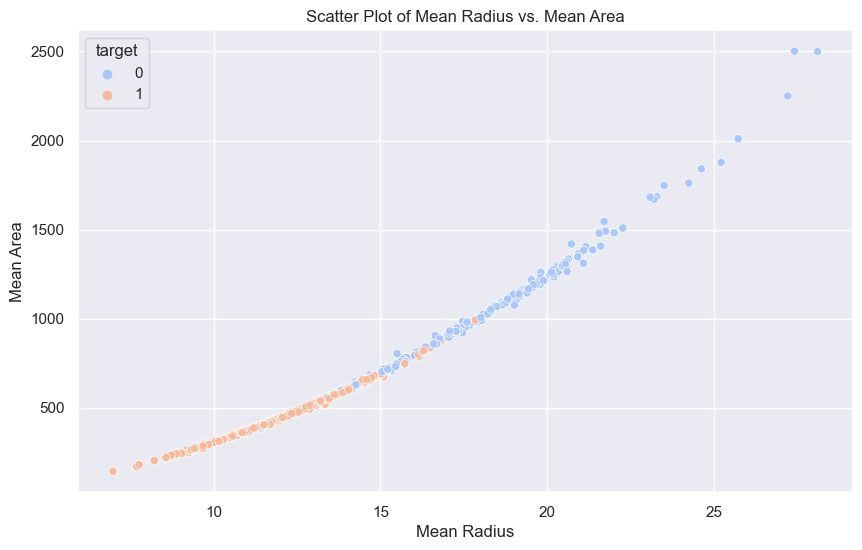

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_radius', y='mean_area', hue='target', data=cancer_details, palette='coolwarm')
plt.title('Scatter Plot of Mean Radius vs. Mean Area')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Area')
plt.show()


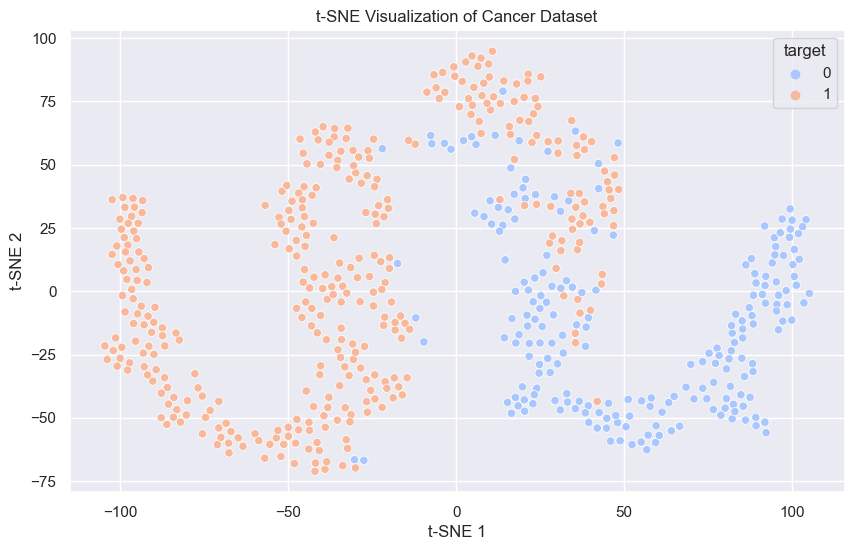

In [137]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
features = cancer_details.drop(columns=['target'])
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['target'] = cancer_details['target']

# Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='target', data=tsne_df, palette='coolwarm', marker='o')
plt.title('t-SNE Visualization of Cancer Dataset')
plt.show()


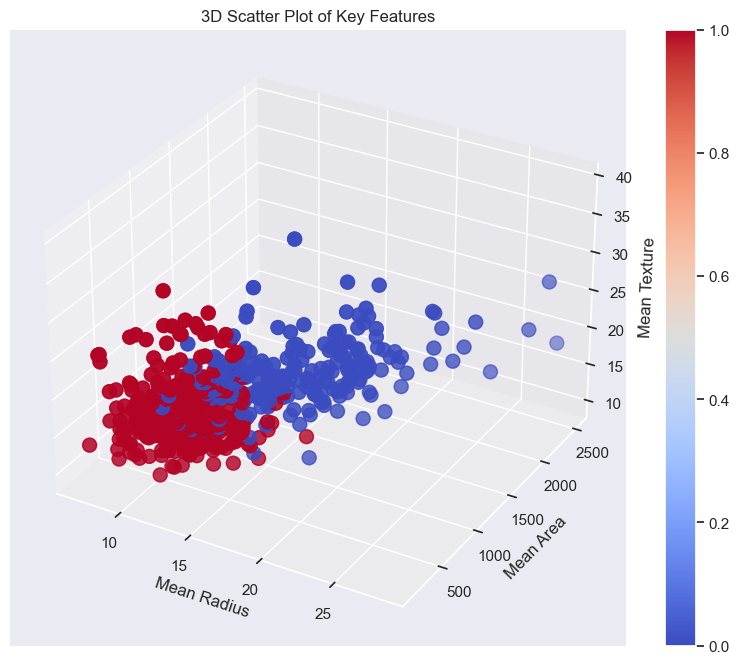

In [140]:
from mpl_toolkits.mplot3d import Axes3D

# Select three features to plot
features = ['mean_radius', 'mean_area', 'mean_texture']

# Prepare the data
X_3d = cancer_details[features]
y = cancer_details['target']

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
scatter = ax.scatter(X_3d['mean_radius'], X_3d['mean_area'], X_3d['mean_texture'], c=y, cmap='coolwarm', s=100)

# Add labels and title
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Area')
ax.set_zlabel('Mean Texture')
ax.set_title('3D Scatter Plot of Key Features')

# Show color bar
plt.colorbar(scatter)
plt.show()


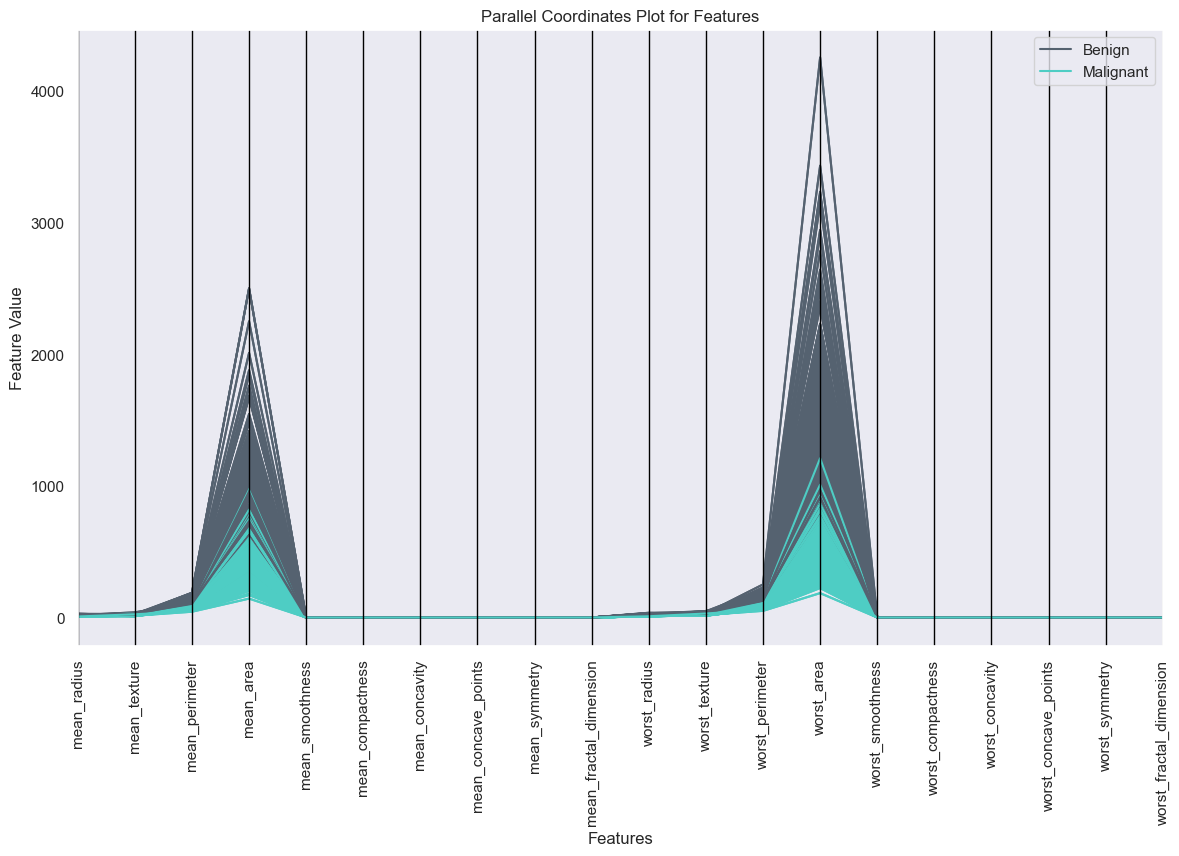

In [141]:
from pandas.plotting import parallel_coordinates

# Add 'target' column to features for coloring
cancer_details['target'] = cancer_details['target'].map({0: 'Benign', 1: 'Malignant'})

# Plot parallel coordinates
plt.figure(figsize=(14, 8))
parallel_coordinates(cancer_details[mean_columns + worst_columns + ['target']], 'target', color=('#556270', '#4ECDC4'))
plt.title("Parallel Coordinates Plot for Features")
plt.xlabel("Features")
plt.ylabel("Feature Value")
plt.xticks(rotation=90)
plt.show()


In [142]:
import plotly.express as px

# Create a sunburst plot based on target
fig = px.sunburst(cancer_details, path=['target'], title="Sunburst Chart of Tumor Types")
fig.show()


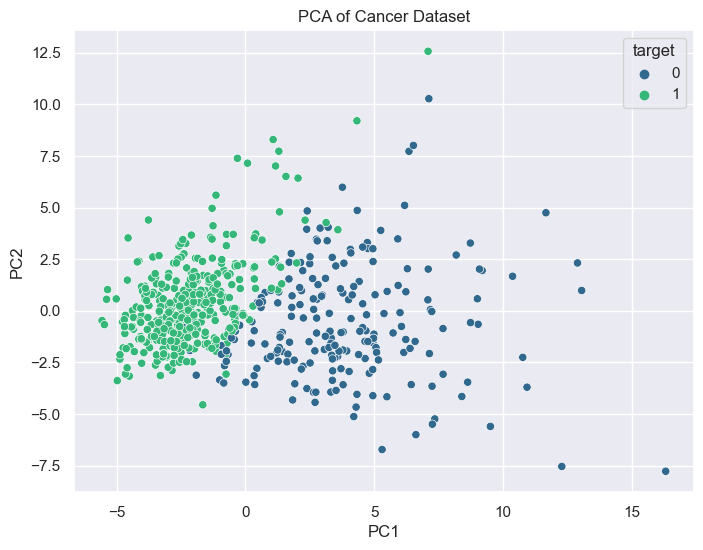

In [151]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
features = df.drop(columns=['target'])  # Drop target column if it exists
features_scaled = StandardScaler().fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

# Plot the PCA result
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Cancer Dataset')
plt.show()


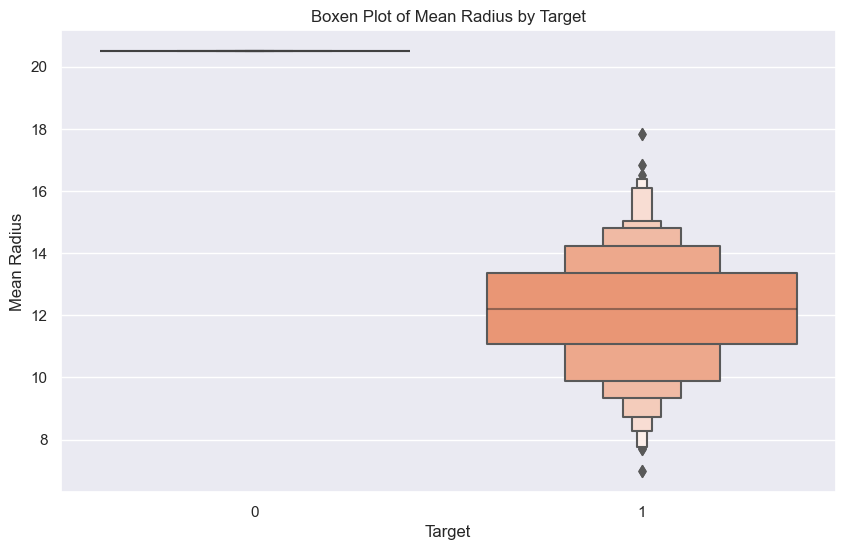

In [172]:
# Boxen plot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxenplot(data=cancer_data, x='target', y='mean_radius', palette='Set2')
plt.title("Boxen Plot of Mean Radius by Target")
plt.xlabel("Target")
plt.ylabel("Mean Radius")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\3256579187.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



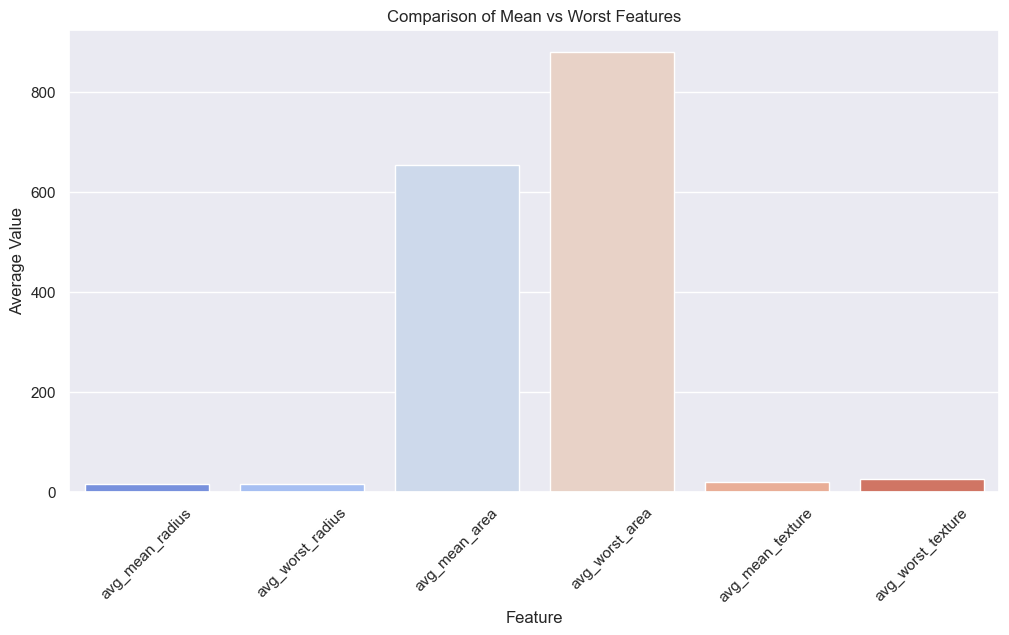

In [177]:
# Query for mean and worst features
query = """
SELECT 
    AVG(mean_radius) AS avg_mean_radius,
    AVG(worst_radius) AS avg_worst_radius,
    AVG(mean_area) AS avg_mean_area,
    AVG(worst_area) AS avg_worst_area,
    AVG(mean_texture) AS avg_mean_texture,
    AVG(worst_texture) AS avg_worst_texture
FROM cancer_details
"""
feature_comparison = pd.read_sql(query, db_connection)

# Prepare data for visualization
feature_comparison_melted = feature_comparison.melt(
    var_name="Feature",
    value_name="Average Value"
)

# Plot bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_comparison_melted,
    x="Feature",
    y="Average Value",
    palette="coolwarm"
)
plt.title("Comparison of Mean vs Worst Features")
plt.xticks(rotation=45)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\249276481.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



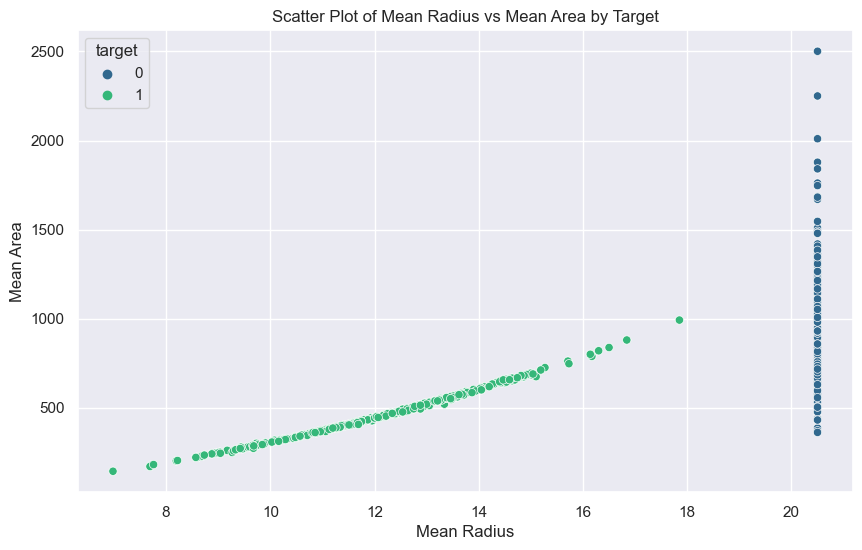

In [178]:
# Query for scatter plot data
query = "SELECT mean_radius, mean_area, target FROM cancer_details"
scatter_data = pd.read_sql(query, db_connection)

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_data,
    x="mean_radius",
    y="mean_area",
    hue="target",
    palette="viridis"
)
plt.title("Scatter Plot of Mean Radius vs Mean Area by Target")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Area")
plt.show()


In [181]:
import plotly.express as px

# Query for sunburst chart data
query = """
SELECT 
    CASE 
        WHEN mean_radius < 12 THEN 'Small'
        WHEN mean_radius BETWEEN 12 AND 18 THEN 'Medium'
        ELSE 'Large'
    END AS radius_category,
    target,
    COUNT(*) AS count
FROM cancer_details
GROUP BY radius_category, target
"""
sunburst_data = pd.read_sql(query, db_connection)

# Create sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['radius_category', 'target'],
    values='count',
    color='target',
    color_continuous_scale='RdBu',
    title='Sunburst Chart: Radius Categories by Target'
)
fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\1386814779.py:16: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\3762349574.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\3762349574.py:14: MatplotlibDeprecationWarning:

The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.



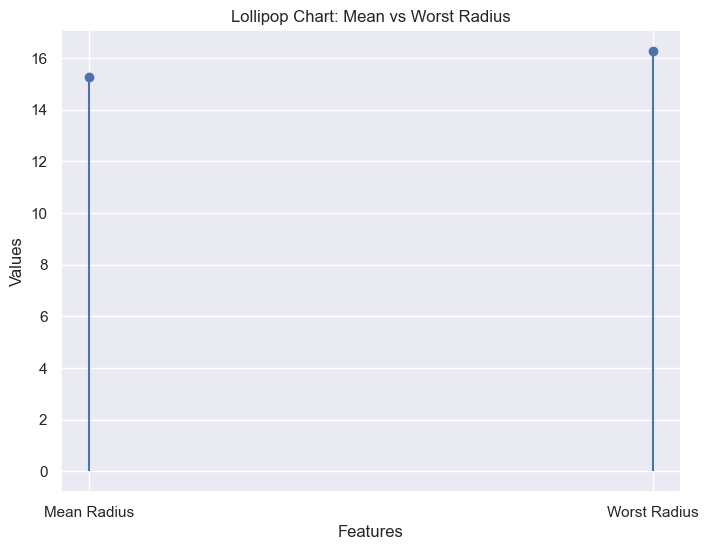

In [186]:
# Query for lollipop data
query = """
SELECT 
    AVG(mean_radius) AS mean_radius,
    AVG(worst_radius) AS worst_radius
FROM cancer_details
"""
lollipop_data = pd.read_sql(query, db_connection)

# Plot lollipop chart
plt.figure(figsize=(8, 6))
x = ['Mean Radius', 'Worst Radius']
y = [lollipop_data['mean_radius'][0], lollipop_data['worst_radius'][0]]
plt.stem(x, y, basefmt=" ", use_line_collection=True)
plt.title("Lollipop Chart: Mean vs Worst Radius")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


In [188]:
import pandas as pd
import mysql.connector
import plotly.express as px

# SQL query to fetch data
query = """
SELECT mean_radius, mean_texture, mean_area, target 
FROM cancer_details;
"""
data = pd.read_sql(query, db_connection)

# 3D scatter plot
fig = px.scatter_3d(
    data,
    x='mean_radius',
    y='mean_texture',
    z='mean_area',
    color='target',
    title="3D Scatter Plot of Radius, Texture, and Area",
    color_continuous_scale='Plasma',
    labels={'target': 'Diagnosis'}
)
fig.update_traces(marker=dict(size=5))
fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_37788\4187174641.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

